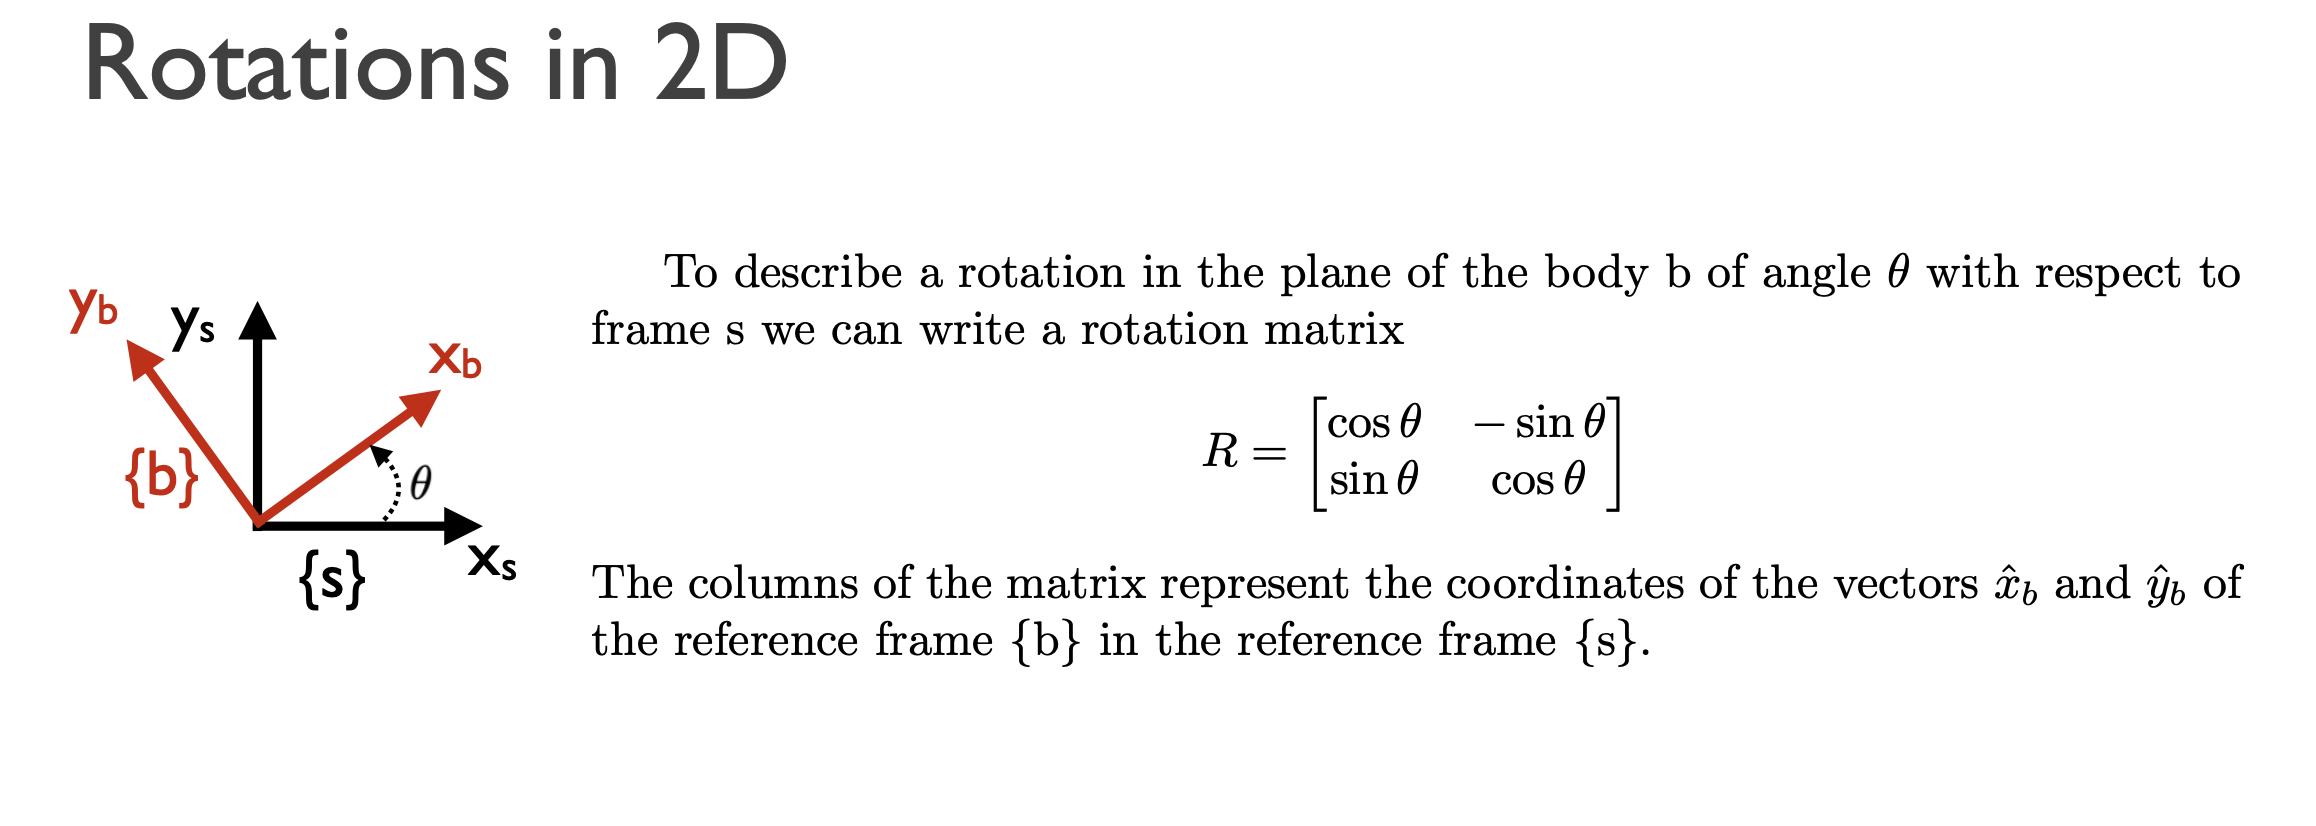

In [1]:
import numpy as np
import math as math
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import sin,cos,pi,exp,sqrt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from IPython.display import display, Latex, Markdown

#this is the library that contains all the rigid body tranforms functions
import transforms as trans
import allfunc as fn

In [2]:
# 2D simple rotation

# Counter CLockwise is positive theta
theta = np.radians(-90)

R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])  # DRAW Instead

print(np.array_repr(R))

array([[ 6.123234e-17,  1.000000e+00],
       [-1.000000e+00,  6.123234e-17]])


In [3]:
# 2D mirror + rotation

# Counter CLockwise is positive theta
theta = np.radians(45)

R = np.array([[-np.cos(theta),np.sin(theta)],[np.sin(theta),np.cos(theta)]])  # DRAW nstead

print(np.array_repr(R))

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])


In [75]:

p_01 = np.array([[0.40785347], [-0.13464365]])
R_01 = np.array([[-0.12115869, -0.99263315], [0.99263315, -0.12115869]])
p_21 = np.array([[0.17846946], [0.20535999]])
R_21 = np.array([[0.77275609, 0.63470310], [-0.63470310, 0.77275609]])


# 2D homogeneous transformation

p1 = p_01
r1 = R_01

t1 = np.array([[0.,0.,0.],[0.,0.,0.],[0.,0.,1.]])

t1[0][2] = p1[0]
t1[1][2] = p1[1]
t1[0][:2] = r1[0]
t1[1][:2] = r1[1]



p2 = p_21
r2 = np.transpose(R_21)
p2 = -r2@p_21


t2 = np.array([[0.,0.,0.],[0.,0.,0.],[0.,0.,1.]])

t2[0][2] = p2[0]
t2[1][2] = p2[1]
t2[0][:2] = r2[0]
t2[1][:2] = r2[1]


t = t1@t2

print(np.array_repr(t))

print((r1@p2)+p1)


array([[-0.72365345, -0.69016352,  0.67873548],
       [ 0.69016352, -0.72365345, -0.10920729],
       [ 0.        ,  0.        ,  1.        ]])
[[ 0.67873548]
 [-0.10920729]]


In [74]:

T_01 = np.array([[-0.57938699, -0.81505259, 0.02865731], [0.81505259, -0.57938699, 0.04109700], [0.00000000, 0.00000000, 1.00000000]])
T_21 = np.array([[-0.62755265, -0.77857412, 0.42005043], [0.77857412, -0.62755265, 0.33393594], [0.00000000, 0.00000000, 1.00000000]])


print(np.array_repr(T_01@T_21))



array([[-0.27098301,  0.96258413, -0.4868898 ],
       [-0.96258413, -0.27098301,  0.18998205],
       [ 0.        ,  0.        ,  1.        ]])


In [90]:

p_4 = np.array([[-0.04340388], [-0.06536943]])
R_14 = np.array([[-0.62859794, -0.77773044], [0.77773044, -0.62859794]])
q_1 = np.array([[-0.43438301], [-0.96785230]])

R_41 = np.transpose(R_14)
p_1 = -np.transpose(R_14)@p_4

print(np.array_repr((R_41@q_1+p_1)))

array([[-0.45611972],
       [ 0.87137524]])


In [95]:
T_74 = np.array([[0.89715347, 0.44171897, 0.89719618], [-0.44171897, 0.89715347, -0.87410686], [0.00000000, 0.00000000, 1.00000000]])
p_7 = np.array([[0.80515685], [0.20637779]])

R_74 = np.array([[0.,0.],[0.,0.]])

P_74 = np.array([[0.],[0.]])

R_74[0] = T_74[0][:2]
R_74[1] = T_74[1][:2]
P_74[0] = T_74[0][2]
P_74[1] = T_74[1][2]

R_47 = np.transpose(R_74)
P_47 = -R_47@P_74

p_4 = R_47@p_7 + P_47

print(np.array_repr(p_4))


array([[-0.55984397],
       [ 0.92870503]])


In [96]:
T_80 = np.array([[-0.99963592, 0.02698197, 0.84828747], [-0.02698197, -0.99963592, -0.49933470], [0.00000000, 0.00000000, 1.00000000]])
v_8 = np.array([[-0.94247001], [0.21877446]])

R_80 = np.array([[0.,0.],[0.,0.]])

R_80[0] = T_80[0][:2]
R_80[1] = T_80[1][:2]

R_08 = np.transpose(R_80)

v_0 = R_08@v_8

print(np.array_repr(v_0))




array([[ 0.93622391],
       [-0.24412451]])


In [114]:
T_83 = np.array([[-0.51262225, -0.60297925, 0.61125646, -0.63293773], [-0.17011515, -0.62647192, -0.76065351, -0.16652703], [0.84159329, -0.49391190, 0.21856754, -0.30120392], [0.00000000, 0.00000000, 0.00000000, 1.00000000]])
p_3 = np.array([[-0.49837079], [-0.12069008], [0.81022909]])

P_83 = np.array([[0.],[0.],[0.]])



R_83,P_83_1 = fn.TransToRp(T_83)

P_83 = P_83_1.reshape(3,1)

R_38 = np.transpose(R_83)
P_38 = -R_38@P_83


p_8 = (R_83@p_3) + P_83


print(p_8)

[[ 0.1905696 ]
 [-0.62244126]
 [-0.48392939]]
